In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import pandas as pd 

In [2]:
from sklearn.datasets import load_files
import numpy as np
DATADIR = "../dataset/fruits-360/Training"
DATADIR_test = "../dataset/fruits-360/Test"

CATEGORIES = ["Apple Braeburn","Apple Crimson Snow","Apple Golden 1","Apple Golden 2","Apple Golden 3",
              "Apple Granny Smith","Apple Pink Lady","Apple Red 1", "Apple Red 2","Apple Red 3","Apple Red Delicious",
              "Apple Red Yellow 1","Apple Red Yellow 2","Banana",
              "Plum","Plum 2", "Plum 3",
             "Pepper Yellow","Pepper Red","Pepper Green",
              "Cherry 1", "Cherry 2", "Cherry Rainier", "Cherry Wax Black", "Cherry Wax Red","Cherry Wax Yellow",
              "Grape Blue", "Grape Pink", "Grape White", "Grape White 2", "Grape White 3", "Grape White 4",
            "Tomato 1","Tomato 2","Tomato 3","Tomato 4","Tomato Yellow","Tomato Maroon",
            "Pear","Pear Abate","Pear Forelle","Pear Kaiser","Pear Monster","Pear Red","Pear Williams",
             "Peach","Peach 2","Peach Flat",
             "Potato Red", "Potato Red Washed","Potato White","Potato Sweet"
             ]

##TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits= {}
for cat in CATEGORIES:
    for typ in TYPES:
        if(cat.startswith(typ)):
            fruits[cat] = typ


In [3]:
def load_dataset(dire):
    lis_files = []
    lis_num_lab =[]
    lis_name_lab = []
    for category in CATEGORIES:
        path = os.path.join(dire,category)
        class_num =TYPES.index(fruits[category])

        class_name = fruits[category]
        for img in tqdm(os.listdir(path)):
               # print("OK: ",os.path.join(path,img) )
                lis_files.append(os.path.join(path,img))
                lis_name_lab.append(class_name)
                lis_num_lab.append(class_num)
                #print("path:  ",os.path.join(path,img)," \n Name: ",class_name," \n Id: ",class_num)

    return pd.DataFrame(list(zip(lis_files,lis_num_lab,lis_name_lab)),columns=('path','label_id',"label_name"))

all_train = load_dataset(DATADIR)
all_test = load_dataset(DATADIR_test)
#x_train, y_train,target_labels = load_dataset(DATADIR)
#x_test, y_test,_ = load_dataset(DATADIR_test)
#print('Loading complete!')

#print('Training set size : ' , x_train.shape[0])
#print('Testing set size : ', x_test.shape[0])

100%|████████████████████████████████████| 150/150 [00:00<00:00, 150261.67it/s]


In [1]:
all_train.sample(frac=1, axis=1).sample(frac=1).reset_index(drop=True)

NameError: name 'all_train' is not defined

In [5]:
all_train = all_train.sample(frac=1, axis=1).sample(frac=1).reset_index(drop=True)
all_test = all_test.sample(frac=1, axis=1).sample(frac=1).reset_index(drop=True)

x_train = np.array(all_train["path"])
y_train = np.array(all_train["label_id"])
target_labels= np.array(all_train["label_name"])

x_test = np.array(all_test["path"])
y_test = np.array(all_test["label_id"])


In [6]:
#def load_dataset(path):
#    data = load_files(path)
#    files = np.array(data['filenames'])
#    print(files)
#    targets = np.array(data['target'])
#    print(targets)
#    target_labels = np.array(data['target_names'])
#    print(target_labels)
#    return files,targets,target_labels
    
#x_train, y_train,target_labels = load_dataset(DATADIR)
#x_test, y_test,_ = load_dataset(DATADIR_test)
#print('Loading complete!')

#print('Training set size : ' , x_train.shape[0])
#print('Testing set size : ', x_test.shape[0])

In [7]:
x_train

array(['../dataset/fruits-360/Training\\Potato Red\\120_100.jpg',
       '../dataset/fruits-360/Training\\Apple Braeburn\\140_100.jpg',
       '../dataset/fruits-360/Training\\Pepper Red\\r_280_100.jpg', ...,
       '../dataset/fruits-360/Training\\Apple Red 3\\r_153_100.jpg',
       '../dataset/fruits-360/Training\\Tomato 3\\r_101_100.jpg',
       '../dataset/fruits-360/Training\\Tomato Yellow\\162_100.jpg'],
      dtype=object)

In [8]:
target_labels

array(['Potato', 'Apple', 'Pepper', ..., 'Apple', 'Tomato', 'Tomato'],
      dtype=object)

In [9]:
y_train    

array([7, 0, 3, ..., 0, 6, 6], dtype=int64)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

y_train

(27908,)
(27908,)
(9335,)
(9335,)


array([7, 0, 3, ..., 0, 6, 6], dtype=int64)

In [11]:
from keras.utils import np_utils
no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]
print(no_of_classes)

Using TensorFlow backend.


10


In [12]:


# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)



Vaildation X :  (7000,)
Vaildation y : (7000, 10)
Test X :  (2335,)
Test y :  (2335, 10)


In [2]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)


Using TensorFlow backend.


NameError: name 'np' is not defined

In [14]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

NameError: name 'np' is not defined

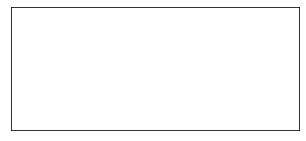

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [24]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(32,32,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [26]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )

Train on 27908 samples, validate on 7000 samples
Epoch 1/10
 - 14s - loss: 0.7360 - accuracy: 0.7439 - val_loss: 0.2250 - val_accuracy: 0.9191
Epoch 2/10
 - 14s - loss: 0.1088 - accuracy: 0.9638 - val_loss: 0.0432 - val_accuracy: 0.9839
Epoch 3/10
 - 15s - loss: 0.0478 - accuracy: 0.9836 - val_loss: 0.0615 - val_accuracy: 0.9730
Epoch 4/10
 - 14s - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0948 - val_accuracy: 0.9740
Epoch 5/10
 - 15s - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0873 - val_accuracy: 0.9707
Epoch 6/10
 - 14s - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0296 - val_accuracy: 0.9906
Epoch 7/10
 - 12s - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0511 - val_accuracy: 0.9881
Epoch 8/10
 - 12s - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 9/10
 - 12s - loss: 0.0147 - accuracy: 0.9958 - val_loss: 0.0435 - val_accuracy: 0.9879
Epoch 10/10
 - 13s - loss: 0.0144 - accuracy: 0.9964 - val_loss: 0.0669 - val_accuracy: 0.9823


In [27]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.980728030204773


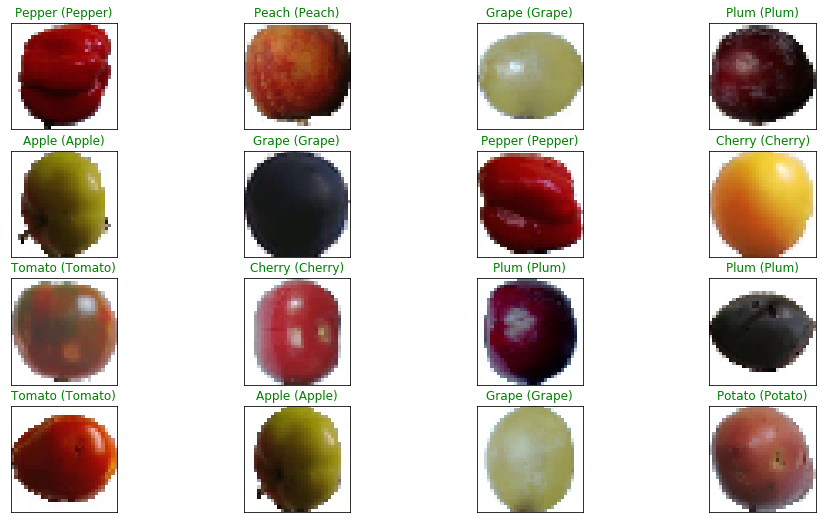

In [37]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

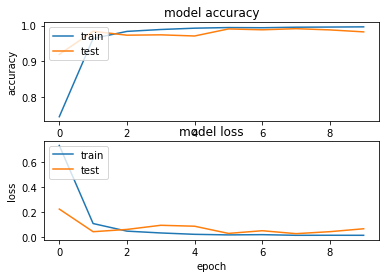

In [38]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(32,32,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation = 'softmax'))
model.summary()



model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
        callbacks=[tensorboard]
        )

# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

In [17]:
from datetime import datetime
from keras.callbacks import TensorBoard

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, 2, input_shape=(32,32,3),padding='same'))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=2))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, 2))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=2))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10,activation = 'softmax'))
    

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
            #
            #!
            #categorical_crossentropy
            #!
            #
            model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
            print('Compiled!')
            
            history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
        callbacks=[tensorboard]
        )

# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

Fruits-1-conv-32-nodes-0-dense-31052020-105703
Compiled!
Train on 27908 samples, validate on 7000 samples
Epoch 1/10


E:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.108056). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 - 12s - loss: 0.3622 - accuracy: 0.8969 - val_loss: 0.2539 - val_accuracy: 0.9120
Epoch 2/10
 - 11s - loss: 0.0387 - accuracy: 0.9909 - val_loss: 0.1794 - val_accuracy: 0.9479
Epoch 3/10
 - 12s - loss: 0.0130 - accuracy: 0.9967 - val_loss: 0.1489 - val_accuracy: 0.9530
Epoch 4/10
 - 12s - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.4072 - val_accuracy: 0.8920
Epoch 5/10
 - 10s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.1297 - val_accuracy: 0.9657
Epoch 6/10
 - 10s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.1401 - val_accuracy: 0.9637
Epoch 7/10
 - 10s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1841 - val_accuracy: 0.9520
Epoch 8/10
 - 10s - loss: 7.3687e-04 - accuracy: 0.9998 - val_loss: 0.1346 - val_accuracy: 0.9683
Epoch 9/10
 - 10s - loss: 4.5836e-04 - accuracy: 0.9999 - val_loss: 0.1582 - val_accuracy: 0.9671
Epoch 10/10
 - 9s - loss: 2.8977e-04 - accuracy: 1.0000 - val_loss: 0.1300 - val_accuracy: 0.9734
Fruits-2-conv-32-nodes-0-dense-31052020-105850
Compiled!
Tr

E:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.124421). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 - 27s - loss: 0.4011 - accuracy: 0.8739 - val_loss: 0.1576 - val_accuracy: 0.9354
Epoch 2/10
 - 27s - loss: 0.0325 - accuracy: 0.9908 - val_loss: 0.1214 - val_accuracy: 0.9647
Epoch 3/10
 - 28s - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.3356 - val_accuracy: 0.8999
Epoch 4/10
 - 29s - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0994 - val_accuracy: 0.9761
Epoch 5/10
 - 27s - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0815 - val_accuracy: 0.9839
Epoch 6/10
 - 24s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1490 - val_accuracy: 0.9726
Epoch 7/10
 - 23s - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.1132 - val_accuracy: 0.9794
Epoch 8/10
 - 23s - loss: 9.1920e-04 - accuracy: 0.9997 - val_loss: 0.0930 - val_accuracy: 0.9833
Epoch 9/10
 - 23s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1259 - val_accuracy: 0.9789
Epoch 10/10
 - 23s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.2623 - val_accuracy: 0.9504
Fruits-3-conv-64-nodes-0-dense-31052020-111035
Compiled!
Train on 

E:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.121461). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 - 12s - loss: 0.9358 - accuracy: 0.7002 - val_loss: 0.6364 - val_accuracy: 0.7860
Epoch 2/10
 - 12s - loss: 0.2173 - accuracy: 0.9397 - val_loss: 0.3598 - val_accuracy: 0.8974
Epoch 3/10
 - 12s - loss: 0.0653 - accuracy: 0.9805 - val_loss: 0.2221 - val_accuracy: 0.9314
Epoch 4/10
 - 11s - loss: 0.0177 - accuracy: 0.9962 - val_loss: 0.1502 - val_accuracy: 0.9557
Epoch 5/10
 - 11s - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.1221 - val_accuracy: 0.9660
Epoch 6/10
 - 12s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0919 - val_accuracy: 0.9756
Epoch 7/10
 - 11s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0819 - val_accuracy: 0.9804
Epoch 8/10
 - 11s - loss: 9.9712e-04 - accuracy: 0.9997 - val_loss: 0.1652 - val_accuracy: 0.9580
Epoch 9/10
 - 11s - loss: 9.4171e-04 - accuracy: 0.9997 - val_loss: 0.1150 - val_accuracy: 0.9814
Epoch 10/10
 - 11s - loss: 2.9304e-04 - accuracy: 0.9999 - val_loss: 0.1001 - val_accuracy: 0.9813
Fruits-2-conv-32-nodes-1-dense-31052020-113954
Compiled!
T

Epoch 8/10
 - 66s - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.2632 - val_accuracy: 0.9770
Epoch 9/10
 - 63s - loss: 0.0059 - accuracy: 0.9993 - val_loss: 0.1730 - val_accuracy: 0.9776
Epoch 10/10
 - 63s - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.2373 - val_accuracy: 0.9673
Fruits-2-conv-128-nodes-2-dense-31052020-125753
Compiled!
Train on 27908 samples, validate on 7000 samples
Epoch 1/10
 - 57s - loss: 0.2911 - accuracy: 0.9060 - val_loss: 2.0389 - val_accuracy: 0.6736
Epoch 2/10
 - 56s - loss: 0.0234 - accuracy: 0.9946 - val_loss: 0.0316 - val_accuracy: 0.9884
Epoch 3/10
 - 53s - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0.0463 - val_accuracy: 0.9907
Epoch 4/10
 - 56s - loss: 0.0121 - accuracy: 0.9979 - val_loss: 0.0398 - val_accuracy: 0.9877
Epoch 5/10
 - 63s - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0225 - val_accuracy: 0.9943
Epoch 6/10
 - 61s - loss: 0.0067 - accuracy: 0.9991 - val_loss: 0.0579 - val_accuracy: 0.9887
Epoch 7/10
 - 57s - loss: 0.0063 - accuracy: 0

E:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.139455). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 - 59s - loss: 0.3877 - accuracy: 0.8680 - val_loss: 0.1759 - val_accuracy: 0.9384
Epoch 2/10
 - 57s - loss: 0.0406 - accuracy: 0.9896 - val_loss: 0.6146 - val_accuracy: 0.8983
Epoch 3/10
 - 56s - loss: 0.0247 - accuracy: 0.9948 - val_loss: 0.0730 - val_accuracy: 0.9886
Epoch 4/10
 - 56s - loss: 0.0195 - accuracy: 0.9970 - val_loss: 0.1418 - val_accuracy: 0.9776
Epoch 5/10
 - 55s - loss: 0.0176 - accuracy: 0.9973 - val_loss: 0.5649 - val_accuracy: 0.9333
Epoch 6/10
 - 56s - loss: 0.0119 - accuracy: 0.9983 - val_loss: 0.0834 - val_accuracy: 0.9914
Epoch 7/10
 - 55s - loss: 0.0158 - accuracy: 0.9984 - val_loss: 0.0513 - val_accuracy: 0.9894
Epoch 8/10
 - 55s - loss: 0.0180 - accuracy: 0.9969 - val_loss: 0.0925 - val_accuracy: 0.9839
Epoch 9/10
 - 55s - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0675 - val_accuracy: 0.9907
Epoch 10/10
 - 52s - loss: 0.0061 - accuracy: 0.9993 - val_loss: 0.0849 - val_accuracy: 0.9901

 Test accuracy: 0.9897216558456421


In [20]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

Fruits-1-conv-32-nodes-0-dense-29052020-162541
Fruits-2-conv-32-nodes-0-dense-29052020-162541
Fruits-3-conv-32-nodes-0-dense-29052020-162541
Fruits-1-conv-64-nodes-0-dense-29052020-162541
Fruits-2-conv-64-nodes-0-dense-29052020-162541
Fruits-3-conv-64-nodes-0-dense-29052020-162541
Fruits-1-conv-128-nodes-0-dense-29052020-162541
Fruits-2-conv-128-nodes-0-dense-29052020-162541
Fruits-3-conv-128-nodes-0-dense-29052020-162541
Fruits-1-conv-32-nodes-1-dense-29052020-162541
Fruits-2-conv-32-nodes-1-dense-29052020-162541
Fruits-3-conv-32-nodes-1-dense-29052020-162541
Fruits-1-conv-64-nodes-1-dense-29052020-162541
Fruits-2-conv-64-nodes-1-dense-29052020-162541
Fruits-3-conv-64-nodes-1-dense-29052020-162541
Fruits-1-conv-128-nodes-1-dense-29052020-162541
Fruits-2-conv-128-nodes-1-dense-29052020-162541
Fruits-3-conv-128-nodes-1-dense-29052020-162541
Fruits-1-conv-32-nodes-2-dense-29052020-162541
Fruits-2-conv-32-nodes-2-dense-29052020-162541
Fruits-3-conv-32-nodes-2-dense-29052020-162541
Fruits-

In [18]:
#Fruits-1-conv-128-nodes-1-dense-29052020-162541
